In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"
import findspark
findspark.init()

spark-3.0.2-bin-hadoop2.7/
spark-3.0.2-bin-hadoop2.7/R/
spark-3.0.2-bin-hadoop2.7/R/lib/
spark-3.0.2-bin-hadoop2.7/R/lib/sparkr.zip
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/worker/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/tests/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/profile/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/profile/shell.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/profile/general.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/doc/index.html
spark-3.0.2-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.0.2-

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [7]:
spark.read.csv("Customer.csv", header=True).createOrReplaceTempView("Customer")
spark.read.csv("Pet.csv", header=True).createOrReplaceTempView("Pet")
spark.read.csv("Product.csv", header=True).createOrReplaceTempView("Product")
spark.read.csv("ProductType.csv", header=True).createOrReplaceTempView("ProductType")
spark.read.csv("TransactionDetail.csv", header=True).createOrReplaceTempView("TransactionDetail")
spark.read.csv("TransactionHeader.csv", header=True).createOrReplaceTempView("TransactionHeader")

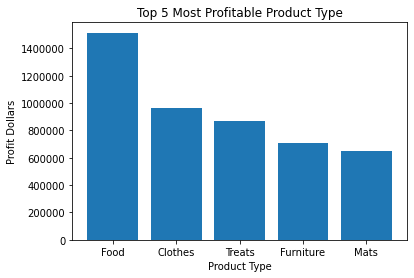

In [29]:
import matplotlib.pyplot as plt
# a.	Show top 5 most profitable product type where the product price must be higher than 10 using bar plot.
data = spark.sql("""
    SELECT SUM(ProductPrice*Quantity) AS profit, ProductTypeName
    FROM Product p
    JOIN TransactionDetail td
    ON p.ProductId=td.ProductId
    JOIN ProductType pt
    ON pt.ProductTypeId=p.ProductTypeId
    WHERE ProductPrice>10
    GROUP BY ProductTypeName
    ORDER BY profit DESC
    LIMIT 5
""").toPandas()

plt.bar(data["ProductTypeName"],data["profit"])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Product Type")
plt.ylabel("Profit Dollars")
plt.title("Top 5 Most Profitable Product Type")
plt.show()

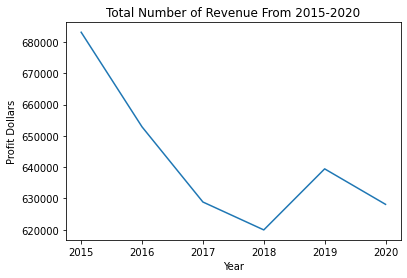

In [30]:
# b.	Show the total number of revenue per year from 2015 until 2020 using line plot.
data = spark.sql("""
    SELECT year(TransactionDate) AS year, SUM(ProductPrice*Quantity) AS Revenue
    FROM Product p
    JOIN TransactionDetail td
    ON p.ProductId=td.ProductId
    JOIN TransactionHeader th
    ON th.TransactionId=td.TransactionId
    WHERE year(TransactionDate) BETWEEN 2015 AND 2020
    GROUP BY year
    ORDER BY year
""").toPandas()

plt.plot(data["year"], data["Revenue"])
plt.xlabel("Year")
plt.ylabel("Profit Dollars")
plt.title("Total Number of Revenue From 2015-2020")
plt.show()

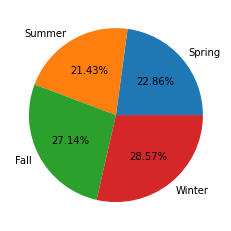

In [57]:
# c.	Show the percentage of fish product transaction for each season in 2020 in which the cost of the transaction is higher than 500 using pie plot. 
answer = spark.sql("""
  SELECT season, count(*) as jumlah
  FROM(
    SELECT 
      td.transactionid,
      SUM(td.quantity * p.productprice) as fishproduct,
    CASE 
        WHEN quarter(th.transactiondate) = 1 then 'Spring'
        WHEN quarter(th.transactiondate) = 2 then 'Summer'
        WHEN quarter(th.transactiondate) = 3 then 'Fall'
        WHEN quarter(th.transactiondate) = 4 then 'Winter'
    END as season
    FROM transactiondetail td 
      JOIN product p on p.productid = td.productid
      JOIN transactionheader th on th.transactionid = td.transactionid
      JOIN pet on pet.petid = p.petid
    WHERE pet.petname = 'Fish' and year(th.transactiondate) = 2020
    GROUP BY td.transactionid, th.transactiondate
    HAVING fishproduct > 500
    )
  GROUP BY season
""").toPandas()


import matplotlib.pyplot as plt

plt.pie(
    answer["jumlah"],
    labels = answer["season"],
    autopct = "%.2f%%"
)

plt.show()

+---------+---+----------+------+--------------+--------------------+
|Education|Sex|Occupation|Income|     assembled|            features|
+---------+---+----------+------+--------------+--------------------+
|       13|  0|         1|     1|[13.0,0.0,1.0]|[5.11692695780867...|
|       13|  0|         4|     1|[13.0,0.0,4.0]|[5.11692695780867...|
|        9|  0|         5|     1| [9.0,0.0,5.0]|[3.54248789386754...|
|        7|  0|         5|     1| [7.0,0.0,5.0]|[2.75526836189697...|
|       13|  1|         0|     1|[13.0,1.0,0.0]|[5.11692695780867...|
|       14|  1|         4|     1|[14.0,1.0,4.0]|[5.51053672379395...|
|        5|  1|         5|     1| [5.0,1.0,5.0]|[1.96804882992641...|
|        9|  0|         4|     0| [9.0,0.0,4.0]|[3.54248789386754...|
|       14|  1|         0|     0|[14.0,1.0,0.0]|[5.51053672379395...|
|       13|  0|         4|     0|[13.0,0.0,4.0]|[5.11692695780867...|
|       10|  0|         4|     0|[10.0,0.0,4.0]|[3.93609765985282...|
|       13|  0|     

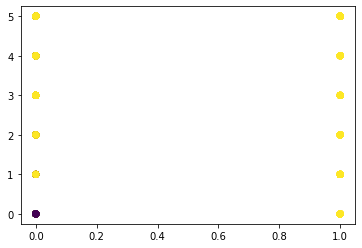

In [31]:
# Classification
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml.feature import VectorAssembler, StandardScaler

spark = SparkSession.builder.getOrCreate()

testing = spark.read.csv("IncomeEvaluationTesting.csv", header = True, inferSchema= True)
training = spark.read.csv("IncomeEvaluationTraining.csv", header = True, inferSchema=True)


columns = ["Education", "Sex", "Occupation", "Income"]

testing = testing.na.drop()
training = training.na.drop()

training = training.select(columns)
testing = testing.select("Education", "Sex", "Occupation", "Income")


training = training.withColumn("Occupation", 
                               when(training["Occupation"] == "Prof-specialty", 0).
                               when(training["Occupation"] == "Adm-clerical", 1).
                               when(training["Occupation"] == "Sales", 2).
                               when(training["Occupation"] == "Tech-support", 3).
                               when(training["Occupation"] == "Exec-managerial", 4).
                               otherwise(5)
                               )

training = training.withColumn("Sex", 
                               when(training["Sex"] == "Male", 0).
                               otherwise(1)
                               )

training = training.withColumn("Income",
                             when(training["Income"] == ">50K", 0).
                             otherwise(1)
                             )

testing = testing.withColumn("Occupation", 
                              when(testing["Occupation"] == "Prof-specialty", 0).
                               when(testing["Occupation"] == "Adm-clerical", 1).
                               when(testing["Occupation"] == "Sales", 2).
                               when(testing["Occupation"] == "Tech-support", 3).
                               when(testing["Occupation"] == "Exec-managerial", 4).
                               otherwise(5)
                               )

testing = testing.withColumn("Sex", 
                               when(testing["Sex"] == "Male", 0).
                               otherwise(1)
                               )

testing = testing.withColumn("Income",
                             when(testing["Income"] == ">50K", 0).
                             otherwise(1)
                             )

columns.remove("Income")

assembler = VectorAssembler(inputCols = columns, outputCol = "assembled")
scaler = StandardScaler(inputCol = "assembled", outputCol = "features")

training = assembler.transform(training)
testing = assembler.transform(testing)

training = scaler.fit(training).transform(training)
testing = scaler.fit(testing).transform(testing)

training.show()
testing.show()


from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt

model = LogisticRegression(featuresCol = "features", labelCol = "Income", maxIter = 1000).fit(training)
data = model.transform(testing)

evaluator = BinaryClassificationEvaluator(labelCol = "Income")

print(evaluator.evaluate(data)*100)

data = data.toPandas()

plt.scatter(
    data["Sex"],
    data["Occupation"],
    c=data["prediction"]
)

plt.show()